In [56]:
from keras.datasets import cifar10
import numpy as np
import pandas as pd
np.random.seed(10)

In [57]:
(x_train, y_train) , (x_test, y_test) = cifar10.load_data()

In [58]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [59]:
x_train_nor = x_train.astype('float32')/ 225.0
x_test_nor = x_test.astype('float32')/ 225.0

In [60]:
from keras.utils import np_utils
y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)

In [61]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [62]:
model = Sequential()

In [63]:
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu', padding='same'))

In [64]:
model.add(Dropout(0.3))

In [65]:
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))

In [66]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [67]:
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))

In [68]:
model.add(Dropout(0.3))

In [69]:
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))

In [70]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [71]:
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))

In [72]:
model.add(Dropout(0.3))

In [73]:
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))

In [74]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [75]:
model.add(Flatten())

In [76]:
model.add(Dropout(0.3))

In [77]:
model.add(Dense(2500, activation='relu'))
model.add(Dropout(0.3))

In [78]:
model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.3))

In [79]:
model.add(Dense(10, activation='softmax'))

In [80]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)       

In [111]:
try:
    model.load_weights('Keras/SaveModel/cifarCnnModel.h5')
    print('載入成功，繼續訓練模型')
except:
    print('載入失敗，重新訓練模型')

載入成功，繼續訓練模型


In [112]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [113]:
train_history = model.fit(x_train_nor, y_train_onehot, validation_split=0.2, epochs=10, batch_size=300, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 111s 3ms/step - loss: 0.1386 - accuracy: 0.9535 - val_loss: 0.8203 - val_accuracy: 0.7964
Epoch 2/10
40000/40000 [==============================] - 111s 3ms/step - loss: 0.1258 - accuracy: 0.9576 - val_loss: 0.8027 - val_accuracy: 0.7964
Epoch 3/10
40000/40000 [==============================] - 111s 3ms/step - loss: 0.1295 - accuracy: 0.9557 - val_loss: 0.7901 - val_accuracy: 0.7961
Epoch 4/10
40000/40000 [==============================] - 111s 3ms/step - loss: 0.1246 - accuracy: 0.9576 - val_loss: 0.8301 - val_accuracy: 0.7959
Epoch 5/10
40000/40000 [==============================] - 118s 3ms/step - loss: 0.1314 - accuracy: 0.9562 - val_loss: 0.7825 - val_accuracy: 0.7942
Epoch 6/10
40000/40000 [==============================] - 120s 3ms/step - loss: 0.1191 - accuracy: 0.9602 - val_loss: 0.7677 - val_accuracy: 0.8005
Epoch 7/10
40000/40000 [==============================] - 113s

In [114]:
model.save_weights('Keras/SaveModel/cifarCnnModel.h5')
print('儲存成功')

儲存成功


In [115]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

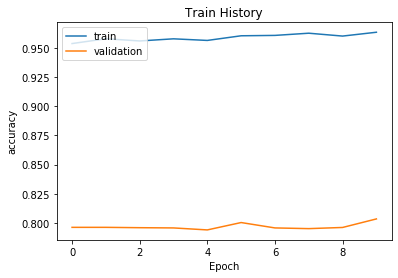

In [116]:
show_train_history(train_history,'accuracy', 'val_accuracy')

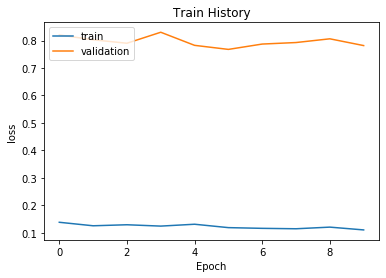

In [117]:
show_train_history(train_history, 'loss', 'val_loss')

In [118]:
scores = model.evaluate(x_test_nor, y_test_onehot, verbose=0)
scores[1]

0.7906000018119812

In [119]:
prediction = model.predict_classes(x_test_nor)

In [120]:
prediction[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 9])

In [121]:
def plot_img_label_prediction(img, label, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25:
        num = 25
    for i in range(0,num):
        ax = plt.subplot(5,5, i+1)
        ax.imshow(img[idx] ,cmap='binary')
        title = str(i)+' , '+label_dict[label[i][0]]
        if len(prediction) > 0:
            title+= '=>' +label_dict[prediction[i]]
            
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx+=1
    plt.show()

In [122]:
label_dict={0:'airplane', 1:'car', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

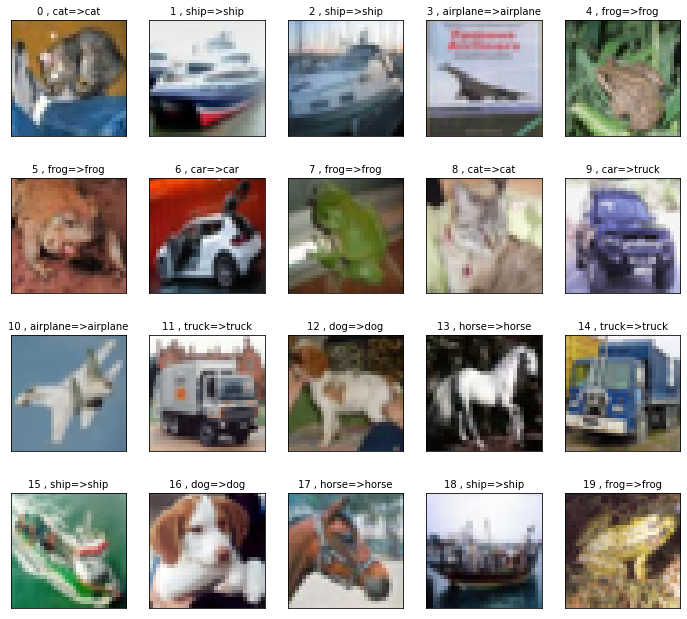

In [123]:
plot_img_label_prediction(x_test, y_test, prediction, 0, 20)

In [124]:
predicted_probability = model.predict(x_test_nor)

In [125]:
def show_predicted_probability(y , prediction, x_img , predicted_probability,i):
    print('label : ', label_dict[y[i][0]],'predict : ' , label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_test[i], (32,32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j] + 'Probability:%1.9f'%(predicted_probability[i][j]))

label :  cat predict :  cat


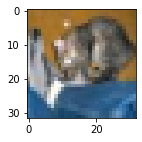

airplaneProbability:0.000000046
carProbability:0.000004330
birdProbability:0.000000002
catProbability:0.851004124
deerProbability:0.000000126
dogProbability:0.140815869
frogProbability:0.000119455
horseProbability:0.000006723
shipProbability:0.000001756
truckProbability:0.008047599


In [126]:
show_predicted_probability(y_test, prediction, x_test, predicted_probability, 0)

In [127]:
prediction.shape

(10000,)

In [128]:
y_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7])

In [129]:
print(label_dict)
pd.crosstab(y_test.reshape(-1), prediction, rownames=['label'], colnames=['predict'])

{0: 'airplane', 1: 'car', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,806,6,69,10,13,6,7,11,59,13
1,14,885,4,8,1,5,6,3,18,56
2,41,5,734,39,76,26,54,14,8,3
3,19,5,100,550,49,150,73,37,6,11
4,13,3,56,40,795,15,34,36,5,3
5,5,2,68,142,47,655,27,40,9,5
6,5,6,35,27,28,15,874,3,6,1
7,8,0,29,32,47,31,2,844,1,6
8,33,11,13,8,2,3,6,4,904,16
